## Pyber Analysis

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df =pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
data_df = pd.merge(ride_df, city_df, how='left', on = ['city','city'])
data_df

# Display the data table for preview
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

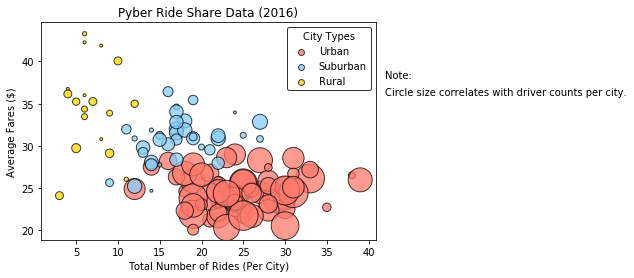

In [5]:
# Obtain the x and y coordinates for each of the three city types

city_grp = data_df.groupby('city')
Avg_fare = city_grp.mean()['fare']
Rides = city_grp['ride_id'].count()
Drivers = city_grp.mean()['driver_count']
types = city_df.set_index('city')['type']

# dataframe from variables created above
scatter_df = pd.DataFrame({"Rides": Rides,"Average Fare": Avg_fare,"Drivers": Drivers,
    "City Type": types
})
scatter_df

#Dataframes by city type
Urban = scatter_df[scatter_df['City Type'] == 'Urban']
Suburban = scatter_df[scatter_df['City Type'] == 'Suburban']
Rural = scatter_df[scatter_df['City Type'] == 'Rural']

#Color Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Salmon':'#FF796C'}
colors = {'Urban': color_scheme['Salmon'],'Suburban': color_scheme['Light Sky Blue'],'Rural': color_scheme['Gold']}

# Create scatter plots for each city type

plt.scatter(Urban['Rides'], Urban['Average Fare'], s = Urban['Drivers']*12, 
            color = colors['Urban'], cmap="salmon", edgecolor = 'black', label = 'Urban', alpha = .75)

plt.scatter(Suburban['Rides'], Suburban['Average Fare'], s = Suburban['Drivers']*9, 
            color = colors['Suburban'], cmap="blues",edgecolor = 'black', label = 'Suburban', alpha = .75)

plt.scatter(Rural['Rides'], Rural['Average Fare'], s = Rural['Drivers']*9,
            color = colors['Rural'], cmap="golds", edgecolor = 'black', label = 'Rural', alpha = .75)

#Title and label scatter plot
plt.title('Pyber Ride Share Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

# Create a legend
legend = plt.legend(title= "City Types", loc='best', fancybox=True,frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(42, 38,'Note:',
         verticalalignment='baseline', horizontalalignment='left', wrap=False)
plt.text(42, 36,'Circle size correlates with driver counts per city.',
         verticalalignment='baseline', horizontalalignment='left', wrap=False)

# Save Figure
plt.savefig("Pyber Ride Share Data 2016.png")


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

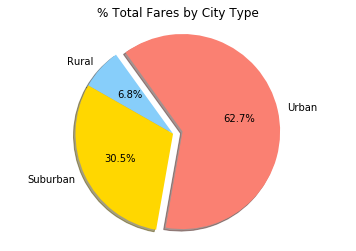

In [7]:
# Calculate Type Percents

total_fares = data_df["fare"].sum()
city_type = ["Urban", "Rural", "Suburban"]

urban_fares = data_df.loc[data_df["type"] =="Urban", "fare"].sum()
rural_fares = data_df.loc[data_df["type"] =="Rural", "fare"].sum()
suburban_fares = data_df.loc[data_df["type"] =="Suburban", "fare"].sum()

urban_pct = (urban_fares / total_fares) 
rural_pct = (rural_fares / total_fares) 
suburban_pct = (suburban_fares / total_fares) 

city_pct = [urban_pct , rural_pct , suburban_pct]
colors = ["salmon", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

# # Build Pie Chart
plt.title("% Total Fares by City Type")
plt.pie(city_pct,  explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.axis("equal")
#plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("Percent of Total Fares by City Type.png")


In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

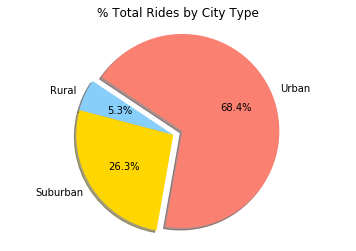

In [9]:
# Calculate Ride Percents

urban_count = data_df.loc[data_df["type"] =="Urban", "ride_id"].count()
rural_count = data_df.loc[data_df["type"] =="Rural", "ride_id"].count()
suburban_count = data_df.loc[data_df["type"] =="Suburban", "ride_id"].count()
ride_count = urban_count + rural_count + suburban_count

urban_pct = (urban_count / ride_count) 
rural_pct = (rural_count / ride_count) 
suburban_pct = (suburban_count / ride_count) 

city_pct = [urban_pct , rural_pct , suburban_pct]
colors = ["salmon", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

# # Build Pie Chart
plt.title("% Total Rides by City Type")
plt.pie(city_pct,  explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

plt.axis("equal")

# Save Figure
plt.savefig(" Percent of Total Rides by City Type.png")


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

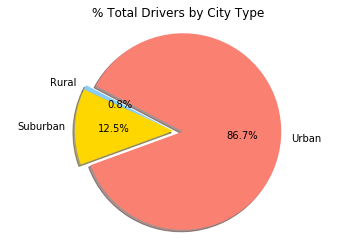

In [11]:
# Calculate Driver Percents

urban_count = data_df.loc[data_df["type"] =="Urban", "driver_count"].sum()
rural_count = data_df.loc[data_df["type"] =="Rural", "driver_count"].sum()
suburban_count = data_df.loc[data_df["type"] =="Suburban", "driver_count"].sum()
driver_count = (urban_count + rural_count + suburban_count)

urban_pct = (urban_count / driver_count) 
rural_pct = (rural_count / driver_count) 
suburban_pct = (suburban_count / driver_count) 

city_pct = [urban_pct , rural_pct , suburban_pct]
colors = ["salmon", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

# # Build Pie Chart
plt.title("% Total Drivers by City Type")
plt.pie(city_pct,  explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")

# Save Figure
plt.savefig("Percent of Total Drivers by City Type")

In [12]:
# Show Figure
plt.show()